<a href="https://colab.research.google.com/github/Sanjanah8/ML-Crate/blob/Asthma-Disease-Detection-Using-Deep-Learning/asthmadetectionusingdeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASTHMA DETECTION USING DEEP LEARNING**

## **Exploratory Data Analysis**

# Data Loading

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('asthma_disease_data.csv')

# Display the first few rows of the dataset
print(df.head())


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       5034   63       0          1               0  15.848744        0   
1       5035   26       1          2               2  22.757042        0   
2       5036   57       0          2               1  18.395396        0   
3       5037   40       1          2               1  38.515278        0   
4       5038   61       0          0               3  19.283802        0   

   PhysicalActivity  DietQuality  SleepQuality  ...  LungFunctionFEV1  \
0          0.894448     5.488696      8.701003  ...          1.369051   
1          5.897329     6.341014      5.153966  ...          2.197767   
2          6.739367     9.196237      6.840647  ...          1.698011   
3          1.404503     5.826532      4.253036  ...          3.032037   
4          4.604493     3.127048      9.625799  ...          3.470589   

   LungFunctionFVC  Wheezing  ShortnessOfBreath  ChestTightness  Coughing  \
0         4.941206         


Basic statistics of the dataset:
         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2392.000000  2392.000000  2392.000000  2392.000000     2392.000000   
mean   6229.500000    42.137960     0.493311     0.669732        1.307274   
std     690.655244    21.606655     0.500060     0.986120        0.898242   
min    5034.000000     5.000000     0.000000     0.000000        0.000000   
25%    5631.750000    23.000000     0.000000     0.000000        1.000000   
50%    6229.500000    42.000000     0.000000     0.000000        1.000000   
75%    6827.250000    61.000000     1.000000     1.000000        2.000000   
max    7425.000000    79.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  PhysicalActivity  DietQuality  SleepQuality  \
count  2392.000000  2392.000000       2392.000000  2392.000000   2392.000000   
mean     27.244877     0.141722          5.051786     5.022867      7.019012   
std       7.201628     0.348838 

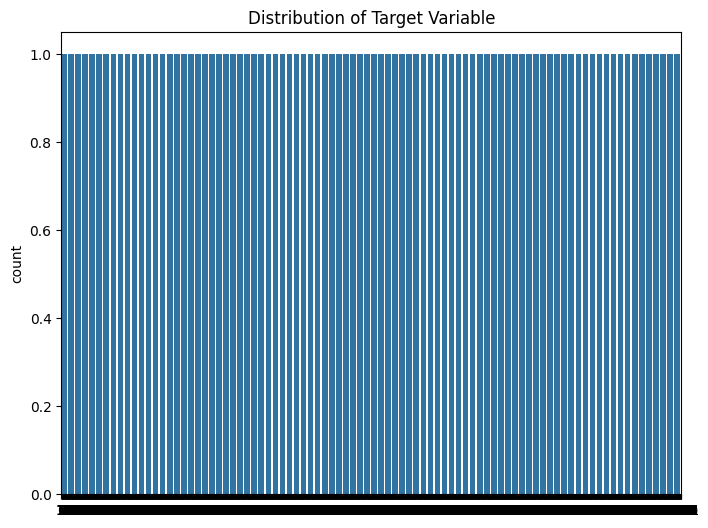

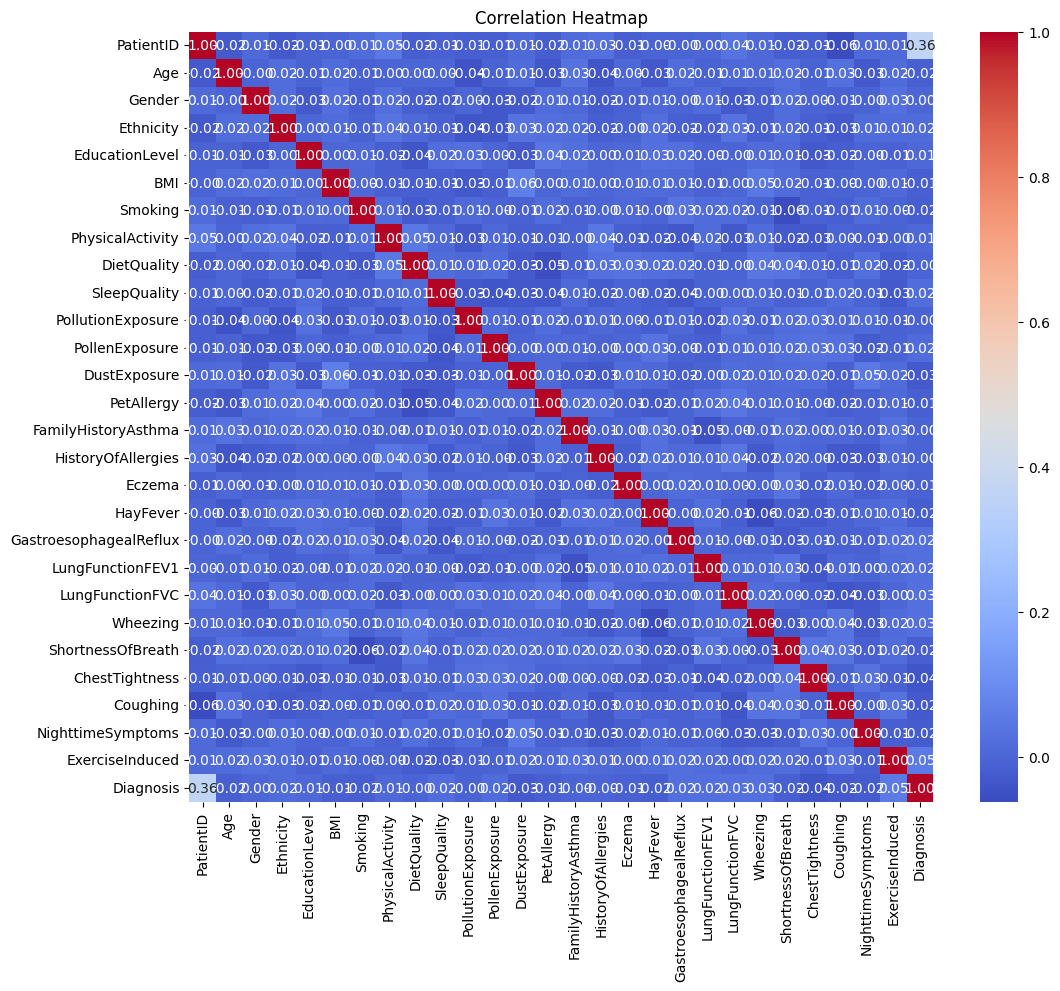

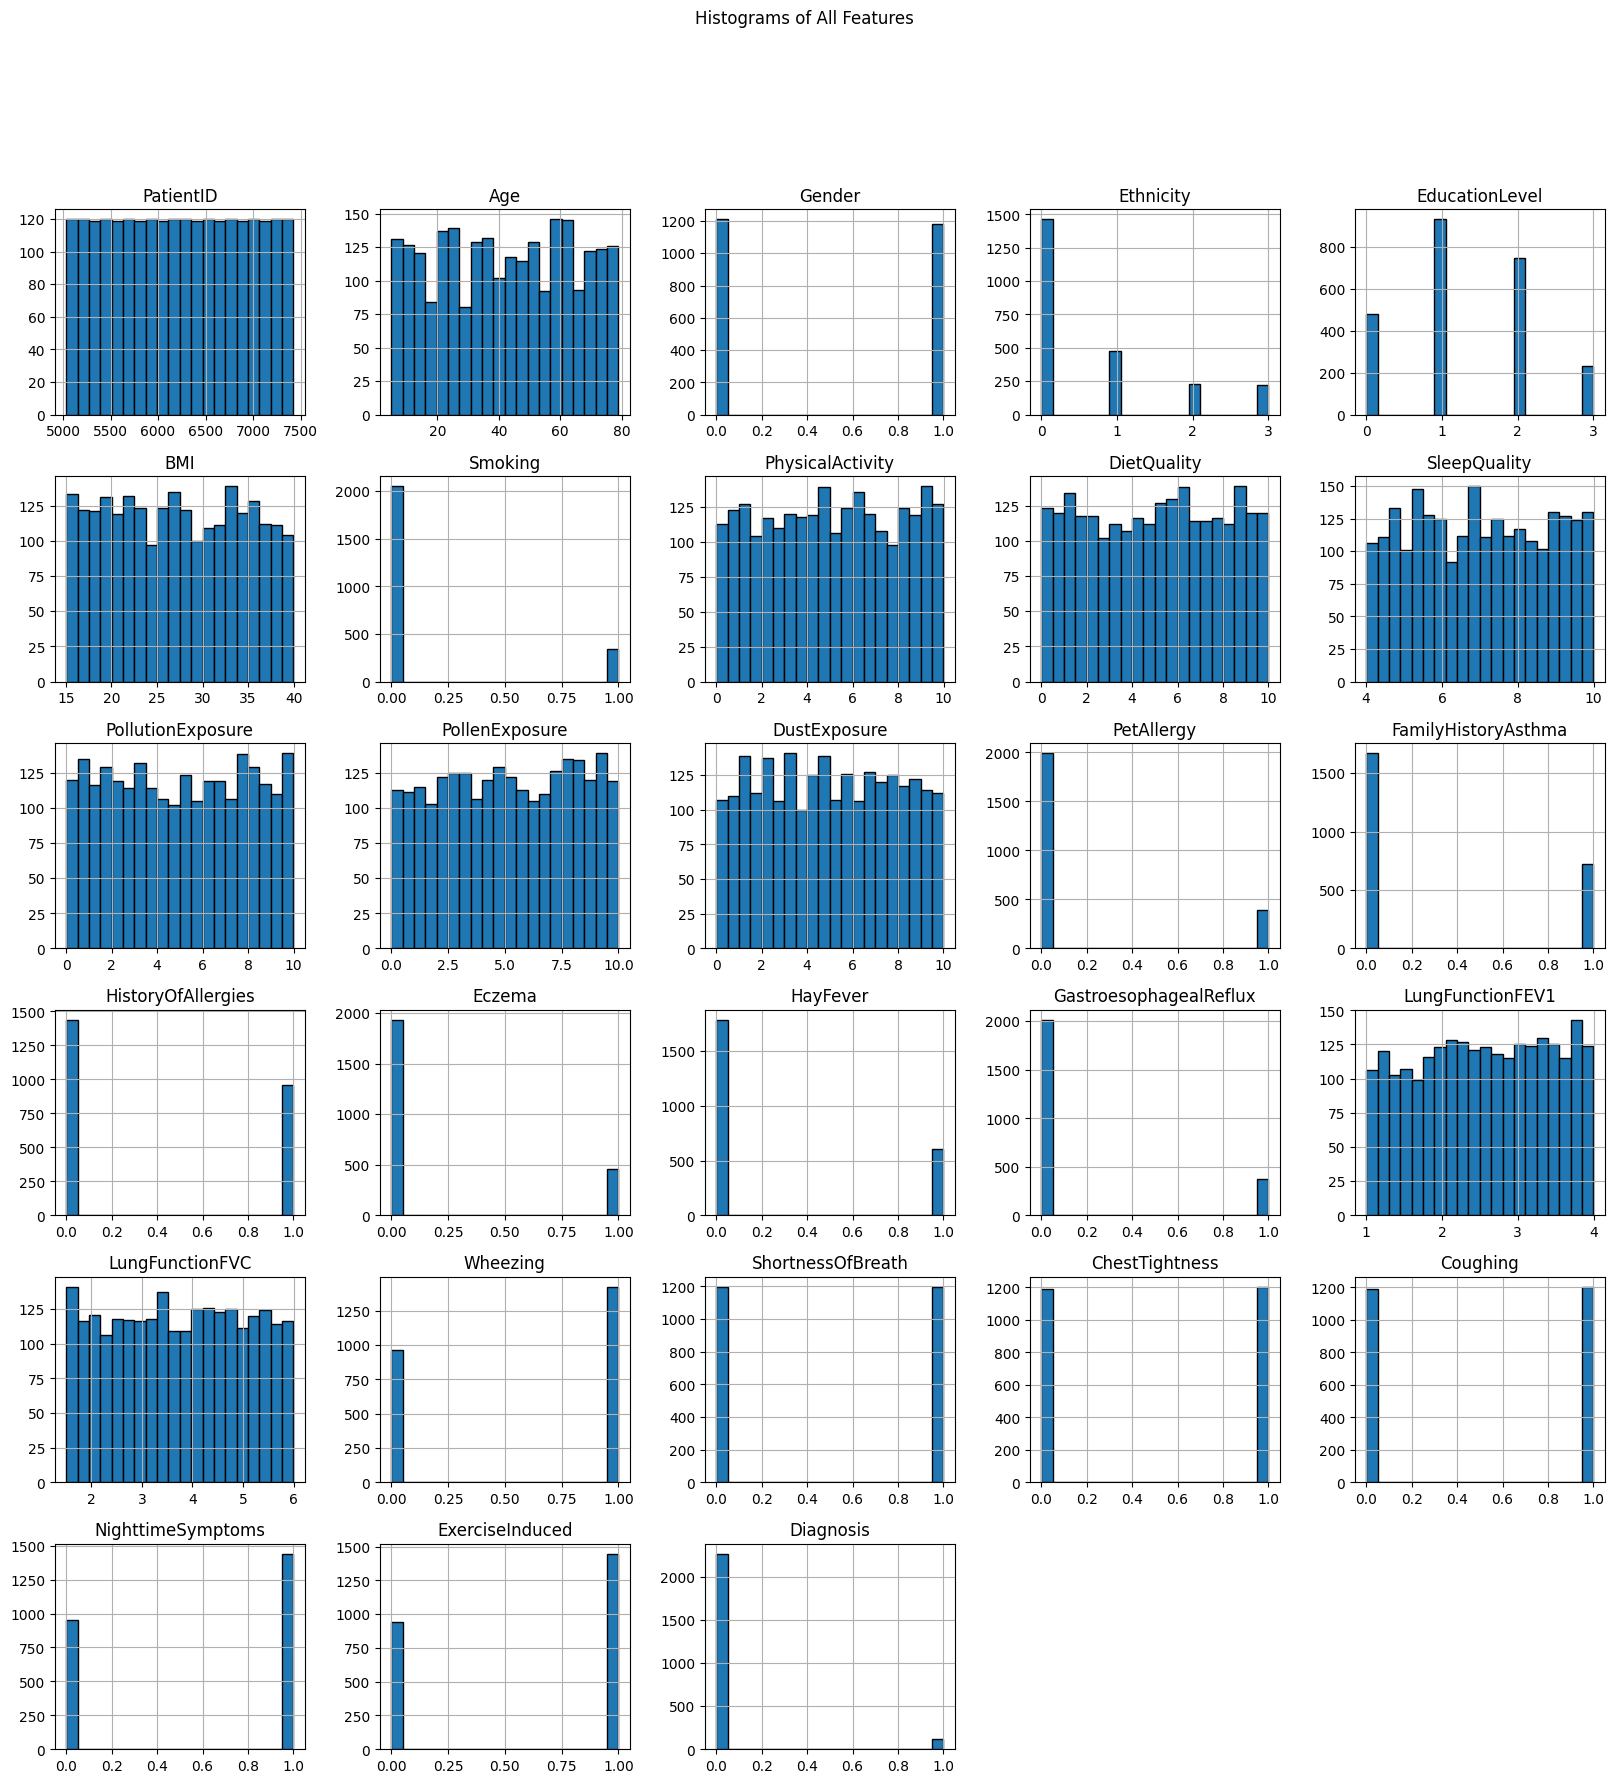

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(df.describe())

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Plotting the distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(df['Diagnosis'])
plt.title('Distribution of Target Variable')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histograms for each feature
df[numeric_cols].hist(figsize=(20, 20), bins=20, edgecolor='black')
plt.suptitle('Histograms of All Features')
plt.show()




# Data Cleaning

In [15]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Ensure 'Diagnosis' is not included in numeric columns for scaling
if 'Diagnosis' in numeric_cols:
    numeric_cols.remove('Diagnosis')

# Handle missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

# Handle missing values for non-numeric columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = imputer_non_numeric.fit_transform(df[non_numeric_cols])
print(numeric_cols)

print(non_numeric_cols)
print("Data cleaning completed.")


['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']
['DoctorInCharge']
Data cleaning completed.


# Feature Engineering

In [20]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting arrays
print("Shapes of the resulting arrays:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Shapes of the resulting arrays:
X_train shape: (1913, 28)
X_test shape: (479, 28)
y_train shape: (1913,)
y_test shape: (479,)


# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the numeric features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Display the mean and standard deviation of the scaled features
print("Mean of scaled features (train):", np.mean(X_train[numeric_cols], axis=0))
print("Standard deviation of scaled features (train):", np.std(X_train[numeric_cols], axis=0))
print("Mean of scaled features (test):", np.mean(X_test[numeric_cols], axis=0))
print("Standard deviation of scaled features (test):", np.std(X_test[numeric_cols], axis=0))



Mean of scaled features (train): PatientID                -1.114286e-16
Age                      -1.355714e-16
Gender                    1.950000e-17
Ethnicity                -7.660713e-17
EducationLevel            8.914284e-17
BMI                      -7.094285e-16
Smoking                   3.342857e-17
PhysicalActivity          0.000000e+00
DietQuality               5.942856e-17
SleepQuality              4.457142e-16
PollutionExposure        -8.264284e-17
PollenExposure            2.024285e-16
DustExposure             -1.671428e-17
PetAllergy               -7.428570e-18
FamilyHistoryAsthma      -7.057142e-17
HistoryOfAllergies        5.037499e-17
Eczema                    1.160714e-17
HayFever                 -3.342857e-17
GastroesophagealReflux   -2.692857e-17
LungFunctionFEV1          4.141428e-16
LungFunctionFVC          -1.764285e-17
Wheezing                 -9.285713e-18
ShortnessOfBreath         7.103570e-17
ChestTightness           -1.151428e-16
Coughing                 -4.828

In [40]:
print(X_train.dtypes)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Or use a different strategy for handling missing values
X_test = X_test.fillna(0)


PatientID                 float64
Age                       float64
Gender                    float64
Ethnicity                 float64
EducationLevel            float64
BMI                       float64
Smoking                   float64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                float64
FamilyHistoryAsthma       float64
HistoryOfAllergies        float64
Eczema                    float64
HayFever                  float64
GastroesophagealReflux    float64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                  float64
ShortnessOfBreath         float64
ChestTightness            float64
Coughing                  float64
NighttimeSymptoms         float64
ExerciseInduced           float64
DoctorInCharge             object
dtype: object


# ANN MODEL USING PYTORCH

In [46]:
# Convert non-numeric columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, columns=X_train.select_dtypes(exclude=[np.number]).columns)
X_test = pd.get_dummies(X_test, columns=X_test.select_dtypes(exclude=[np.number]).columns)

# Ensure both training and testing sets have the same columns after one-hot encoding
missing_cols_test = set(X_train.columns) - set(X_test.columns)
for col in missing_cols_test:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Convert to PyTorch tensors
# Convert all values to float before creating tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [51]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('asthma_disease_data.csv')

# Handle missing values and preprocessing
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if 'Diagnosis' in numeric_cols:
    numeric_cols.remove('Diagnosis')

# Handle missing values
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = imputer_non_numeric.fit_transform(df[non_numeric_cols])

# Convert non-numeric columns to numeric using one-hot encoding
X = df.drop('Diagnosis', axis=1)
X = pd.get_dummies(X, columns=non_numeric_cols)
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Ensure both training and testing sets have the same columns after one-hot encoding
missing_cols_test = set(X_train.columns) - set(X_test.columns)
for col in missing_cols_test:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.softmax(out)
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = len(y.unique())

model = ANNModel(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()  # Using CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy_ann1 = accuracy_score(y_test_tensor, predicted)
    print("PyTorch ANN Accuracy:", accuracy_ann1)





Epoch [10/100], Loss: 0.3662
Epoch [20/100], Loss: 0.3661
Epoch [30/100], Loss: 0.3661
Epoch [40/100], Loss: 0.3661
Epoch [50/100], Loss: 0.3661
Epoch [60/100], Loss: 0.3661
Epoch [70/100], Loss: 0.3661
Epoch [80/100], Loss: 0.3661
Epoch [90/100], Loss: 0.3661
Epoch [100/100], Loss: 0.3661
PyTorch ANN Accuracy: 0.9519832985386222


ANN model 2 USING PYTORCH

In [52]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('asthma_disease_data.csv')

# Handle missing values and preprocessing
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if 'Diagnosis' in numeric_cols:
    numeric_cols.remove('Diagnosis')

# Handle missing values
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = imputer_non_numeric.fit_transform(df[non_numeric_cols])

# Convert non-numeric columns to numeric using one-hot encoding
X = df.drop('Diagnosis', axis=1)
X = pd.get_dummies(X, columns=non_numeric_cols)
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Ensure both training and testing sets have the same columns after one-hot encoding
missing_cols_test = set(X_train.columns) - set(X_test.columns)
for col in missing_cols_test:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define another ANN model
class AnotherANNModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(AnotherANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.softmax(out)
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = len(y.unique())

model = AnotherANNModel(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
criterion = nn.CrossEntropyLoss()  # Using CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy_ann2 = accuracy_score(y_test_tensor, predicted)
    print("PyTorch Another ANN Accuracy:", accuracy_ann2)


Epoch [10/100], Loss: 0.3661
Epoch [20/100], Loss: 0.3661
Epoch [30/100], Loss: 0.3661
Epoch [40/100], Loss: 0.3661
Epoch [50/100], Loss: 0.3661
Epoch [60/100], Loss: 0.3661
Epoch [70/100], Loss: 0.3661
Epoch [80/100], Loss: 0.3661
Epoch [90/100], Loss: 0.3661
Epoch [100/100], Loss: 0.3661
PyTorch Another ANN Accuracy: 0.9519832985386222


# Machine Learning Models

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train and evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

# Train and evaluate Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)

# Train and evaluate Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)

# Train and evaluate Support Vector Classifier
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy:", accuracy_svc)

# Train and evaluate Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Classifier Accuracy:", accuracy_gradient_boosting)


Logistic Regression Accuracy: 0.9311064718162839
Decision Tree Accuracy: 0.9457202505219207
Random Forest Accuracy: 0.9394572025052192
Support Vector Classifier Accuracy: 0.9519832985386222
Gradient Boosting Classifier Accuracy: 0.9457202505219207


# **BEST MODEL**

In [53]:
# Create a DataFrame to display the accuracies
results = {
    'Model': [
        'First ANN Model', 'Second ANN Model',
        'Logistic Regression', 'Decision Tree Classifier',
        'Random Forest Classifier', 'Support Vector Classifier',
        'Gradient Boosting Classifier'
    ],
    'Accuracy': [
        accuracy_ann1, accuracy_ann2,
        accuracy_log_reg, accuracy_decision_tree,
        accuracy_random_forest, accuracy_svc,
        accuracy_gradient_boosting
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

                          Model  Accuracy
0               First ANN Model  0.951983
1              Second ANN Model  0.951983
2           Logistic Regression  0.931106
3      Decision Tree Classifier  0.945720
4      Random Forest Classifier  0.939457
5     Support Vector Classifier  0.951983
6  Gradient Boosting Classifier  0.945720
